# Collect data from VDJdb

First, download the release zip file from https://github.com/antigenomics/vdjdb-db/releases and extract it into the ``TCRdata/raw/database/VDJdb/`` folder. 

Example:
- vdjdb-2023-06-01.zip
  - main data: 
    - vdjdb.txt
    - vdjdb_full.txt
  - vdjdb_summary_embed.html: statistics

In [1]:
import os
import pandas as pd
from utils import save_csv, plot_non_empty_percentage

to_your_path = '/data/lujd/'

### ¶ prepare data

#### What is vdjdb.txt?

In [20]:
''' 
Instructions:
    vdjdb-2023-06-01: latest releadse version
        main data: vdjdb.txt, vdjdb_full.txt
        vdjdb_summary_embed.html: statistics
'''

datapath = to_your_path + "TCRdata/raw/database/VDJdb/vdjdb-2023-06-01/"
vdjdb_filename = "vdjdb.txt"
vdjdb_df = pd.read_csv(datapath+vdjdb_filename, sep="\t")
vdjdb_df.drop_duplicates(inplace=True, ignore_index=True)

print(f"number of rows: {len(vdjdb_df)}")

number of rows: 92651


#### What is vdjdb_full.txt?

In [21]:
vdjdb_full_filename = "vdjdb_full.txt"
vdjdb_full_df = pd.read_csv(datapath+vdjdb_full_filename, sep="\t", low_memory=False)
vdjdb_full_df.drop_duplicates(inplace=True, ignore_index=True)

print(f"number of rows: {len(vdjdb_full_df)}")

number of rows: 61636


- `vdjdb.txt`: TRA-pHLA, TRB-pHLA
- `vdjdb_full.txt`: (TRA TRB pair)-pHLA

- No. cdr3 in vdjdb.txt == No. cdr3.alpha + No. cdr3.beta in vdjdb_full.txt
    - if don't use `drop_duplicates()`

#### what does each column mean?

In [22]:
meta_filename = "vdjdb.meta.txt"
meta_df = pd.read_csv(datapath+meta_filename, sep="\t")
meta_df[["name", "comment"]]

,name,comment
0,complex.id,TCR alpha and beta chain records having the sa...
1,gene,TCR chain: alpha or beta.
2,cdr3,TCR complementarity determining region 3 (CDR3...
3,v.segm,TCR Variable segment allele.
4,j.segm,TCR Joining segment allele.
5,species,TCR parent species.
6,mhc.a,First MHC chain allele.
7,mhc.b,Second MHC chain allele (defaults to Beta2Micr...
8,mhc.class,MHC class (I or II).
9,antigen.epitope,Amino acid sequence of the epitope.


- **vdjdb.score**

In [23]:
meta_df.loc[16, 'comment']

'VDJdb confidence score, the higher is the score the more confidence we have in the antigen specificity annotation of a given TCR clonotype/clone. Zero score indicates that there are insufficient method details to draw any conclusion.'

### ¶ Process `vdjdb_full.txt` only

In [24]:
brief_vdjdb_full_df = vdjdb_full_df[[
    'antigen.epitope', 'antigen.gene', 'antigen.species', 
    'mhc.a', 'mhc.b', 'mhc.class',
    'v.alpha', 'j.alpha', 'cdr3.alpha', 'v.beta', 'd.beta', 'j.beta', 'cdr3.beta', 
    'vdjdb.score', 
    'species', 'meta.tissue', 'meta.structure.id'
]]

brief_vdjdb_full_df = brief_vdjdb_full_df.rename(
                                        columns={
                                                'v.alpha':'alpha.v', 
                                                'j.alpha':'alpha.j', 
                                                'cdr3.alpha':'alpha.cdr3',
                                                'v.beta':'beta.v', 
                                                'd.beta':'beta.d', 
                                                'j.beta':'beta.j', 
                                                'cdr3.beta':'beta.cdr3',
                                                'meta.tissue':'tissue',
                                                'meta.structure.id':'pdb.id'})

brief_vdjdb_full_df.head(2)

,antigen.epitope,antigen.gene,antigen.species,mhc.a,mhc.b,mhc.class,alpha.v,alpha.j,alpha.cdr3,beta.v,beta.d,beta.j,beta.cdr3,vdjdb.score,species,tissue,pdb.id
0,FLKEKGGL,Nef,HIV-1,HLA-B*08,B2M,MHCI,TRAV26-1*01,TRAJ43*01,CIVRAPGRADMRF,TRBV13*01,NaN,TRBJ1-5*01,CASSYLPGQGDHYSNQPQHF,2,HomoSapiens,PBMC,NaN
1,FLKEKGGL,Nef,HIV-1,HLA-B*08,B2M,MHCI,NaN,NaN,NaN,TRBV13*01,NaN,TRBJ1-5*01,CASSFEAGQGFFSNQPQHF,2,HomoSapiens,PBMC,NaN


### ¶ Save data to ``TCRdata/collect/``

In [25]:
print(f"number of processed data: {len(brief_vdjdb_full_df)}")

final_vdjdb_df = brief_vdjdb_full_df.drop_duplicates(ignore_index=True)
print(f"number of duplicated processed data: {len(final_vdjdb_df)}")

savepath = to_your_path + "TCRdata/collect/"
savename = "VDJdb_pair.csv"
save_csv(final_vdjdb_df, savepath, savename)

number of processed data: 61636
number of duplicated processed data: 57551
File /data/lujd/TCRdata/collect/VDJdb_pair.csv has been successfully saved.


---
### ¶ Barplot to see how many elements are missing?

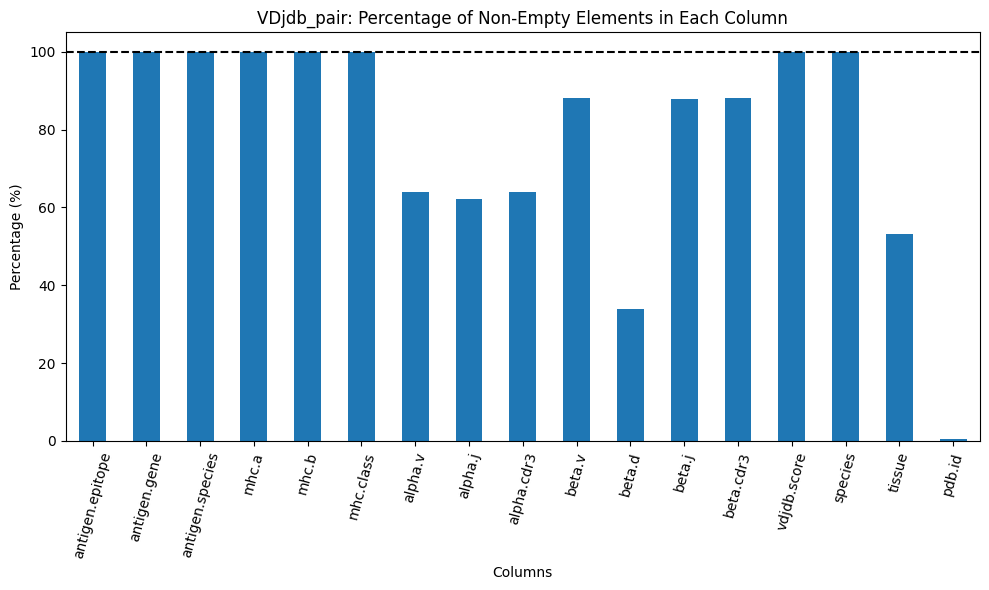

In [26]:
from utils import plot_non_empty_percentage

database = "VDjdb_pair"
plot_non_empty_percentage(final_vdjdb_df, database)